### *Juho Laitala*

## Read ECG example from scipy

In [1]:
from ecg2rr import detector
from scipy.misc import electrocardiogram
import numpy as np
from matplotlib import pyplot as plt
ecg = electrocardiogram()

## Initialize detector and detect R-peak locations

Initialize detector by giving it the LSTM model, sampling rate of the ECG signal, stride used to move the window and probability threshold to filter model predictions.

In [2]:
# Initialize detector
dt = detector.ECG_detector(
    sampling_rate=360,
    stride=250,
    threshold=0.05
)

## Predict R-peak locations

In [3]:
# Get peak location indices and their probabilities
peaks, probs = dt.find_peaks(ecg)

## Filter out R-peaks that occur unnaturally close

In [4]:
filtered_peaks = dt.remove_close(peaks=peaks, peak_probs=probs, threshold_ms=300)

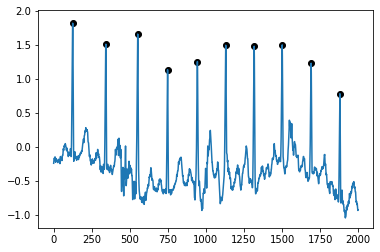

In [5]:
# Plot found R-peaks with the ECG signal
plt.plot(ecg[:2000])
plt.scatter(x=filtered_peaks[:10], y=ecg[filtered_peaks[:10]], color='black')